# Introducción a Redes Bayesianas

## ¿Qué es una Red Bayesiana?

Una red bayesiana es un grafo dirigido acíclico donde:
- Los nodos representan variables aleatorias.
- Los arcos representan dependencias probabilísticas.
- Cada nodo tiene una tabla de probabilidad condicional (CPD).

Ejemplo: Queremos modelar si una persona lleva paraguas.

Variables:
Clima: **{Lluvia, No lluvia}**
Nubes: **{Nublado, Despejado}**
Paraguas: **{Sí, No}**

In [2]:
!pip install pgmpy --quiet


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from pgmpy.models import DiscreteBayesianNetwork 
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

## Construcción del modelo

In [7]:
modelo = DiscreteBayesianNetwork([
("Clima", "Nubes"),
("Clima", "Paraguas"),
("Nubes", "Paraguas")
])

## Definir las Tablas de Probabilidad Condicional (CPDs)

In [8]:
# Probabilidades del clima
cpd_clima = TabularCPD(
    variable="Clima", variable_card=2,
    values=[[0.3], # Probabilidad de Lluvia
    [0.7]] # Probabilidad de No Lluvia
)

In [9]:
# Probabilidades de nubes dado el clima
cpd_nubes = TabularCPD(
    variable="Nubes", variable_card=2,
    values=[[0.8, 0.2], # Prob(Nublado | Lluvia), Prob(Nublado | No Lluvia)
    [0.2, 0.8]], # Prob(Despejado | Lluvia), Prob(Despejado | No Lluvia)
    evidence=["Clima"], evidence_card=[2]
)

In [10]:
# Probabilidades de paraguas dado clima y nubes
cpd_paraguas = TabularCPD(
    variable="Paraguas", variable_card=2,
    values=[
        [0.9, 0.7, 0.6, 0.1], # Prob(Sí | combinaciones de Clima y Nubes)
        [0.1, 0.3, 0.4, 0.9] # Prob(No | combinaciones de Clima y Nubes)
    ],
    evidence=["Clima", "Nubes"], evidence_card=[2, 2]
)

In [13]:
# Añadir CPDs al modelo
# En las redes bayesianas, los CPDs (Conditional Probability Distributions o Distribuciones de Probabilidad Condicional) 
# son las tablas que describen cómo se comporta cada variable dado el estado de sus padres en el grafo.
modelo.add_cpds(cpd_clima, cpd_nubes, cpd_paraguas)

In [12]:
# Verificación de consistencia
print("¿El modelo es válido?", modelo.check_model())

¿El modelo es válido? True


## Inferencia en la Red Bayesiana

In [14]:
inferencia = VariableElimination(modelo)

### Ejemplo 1: Probabilidad de que alguien lleve paraguas sin evidencia

In [15]:
resultado1 = inferencia.query(variables=["Paraguas"])
print("\nProbabilidad de llevar paraguas:")
print(resultado1)


Probabilidad de llevar paraguas:
+-------------+-----------------+
| Paraguas    |   phi(Paraguas) |
+=============+=================+
| Paraguas(0) |          0.3980 |
+-------------+-----------------+
| Paraguas(1) |          0.6020 |
+-------------+-----------------+


### Ejemplo 2: Probabilidad de llevar paraguas si está nublado

In [16]:
resultado2 = inferencia.query(variables=["Paraguas"], evidence={"Nubes": 0})
print("\nProbabilidad de llevar paraguas si está nublado:")
print(resultado2)


Probabilidad de llevar paraguas si está nublado:
+-------------+-----------------+
| Paraguas    |   phi(Paraguas) |
+=============+=================+
| Paraguas(0) |          0.7895 |
+-------------+-----------------+
| Paraguas(1) |          0.2105 |
+-------------+-----------------+


### Ejemplo 3: Probabilidad de lluvia dado que alguien lleva paraguas

In [17]:
resultado3 = inferencia.query(variables=["Clima"], evidence={"Paraguas": 0})
print("\nProbabilidad de lluvia si la persona lleva paraguas:")
print(resultado3)


Probabilidad de lluvia si la persona lleva paraguas:
+----------+--------------+
| Clima    |   phi(Clima) |
+==========+==============+
| Clima(0) |       0.6482 |
+----------+--------------+
| Clima(1) |       0.3518 |
+----------+--------------+


## Visualización de la Red Bayesiana

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

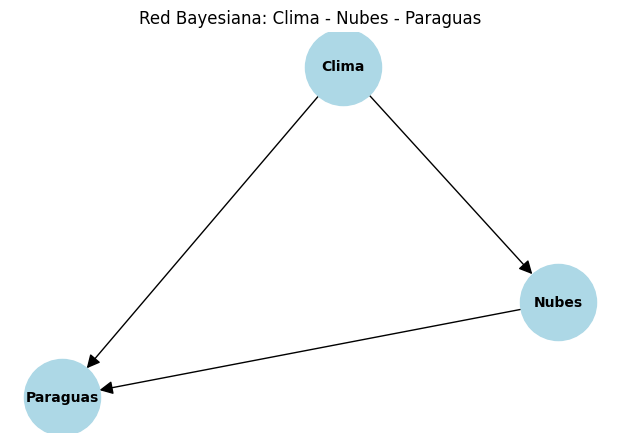

In [23]:
plt.figure(figsize=(6,4))

# Crear grafo de networkx a partir de nodos y aristas del modelo
G = nx.DiGraph()
G.add_nodes_from(modelo.nodes())
G.add_edges_from(modelo.edges())

# Dibujar el grafo
pos = nx.spring_layout(G, seed=42)  # layout para posiciones
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=3000,
    node_color="lightblue",
    font_size=10,
    font_weight="bold",
    arrows=True,
    arrowsize=20
)

plt.title("Red Bayesiana: Clima - Nubes - Paraguas")
plt.show()